## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti. 

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**. 

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [5]:
#Dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from PIL import Image
from keras.utils import img_to_array
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
# Conectamos a Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
# Declaramos función para leer conjuntos de imagenes
def get_data(data):
  lista = []
  for file in os.listdir(data):
    image = Image.open(data + file).convert("L") # Leemos cada imagen
    image = image.resize((150, 150)) # Reescalamos la imagen a 150x150 pixeles
    image = img_to_array(image) # Se convierte la imagen a array
    lista.append(image) # Anadimos a la lista
  return lista

In [109]:
# Cargamos los conjuntos
train_normal   = get_data('/content/drive/My Drive/chest_xray/train/NORMAL/')
train_neumonia = get_data('/content/drive/My Drive/chest_xray/train/PNEUMONIA/')
test_normal    = get_data('/content/drive/My Drive/chest_xray/test/NORMAL/')
test_neumonia  = get_data('/content/drive/My Drive/chest_xray/test/PNEUMONIA/')
val_normal     = get_data('/content/drive/My Drive/chest_xray/val/NORMAL/')
val_neumonia   = get_data('/content/drive/My Drive/chest_xray/val/PNEUMONIA/')

In [128]:
# Dimensionamos cada conjunto para asegurarnos de que tengan tamaños iguales
muestra = np.random.randint(1000) # Fijamos un numero aleatorio para las muestras a visualizar para asegurarnos que esten correctas
print(f'Las dimensiones del conjunto de entrenamiento normal son :       {train_normal[muestra].shape}')
print(f'Las dimensiones del conjunto de entrenamiento con neumonia son : {train_neumonia[muestra].shape}')
muestra2 = np.random.randint(200) # Fijamos un numero aleatorio para las muestras a visualizar para asegurarnos que esten correctas
print(f'Las dimensiones del conjunto de prueba normal son :              {test_normal[muestra2].shape}')
print(f'Las dimensiones del conjunto de prueba con neumonia son :        {test_neumonia[muestra2].shape}')
print(f'Las dimensiones del conjunto de validación normal son :          {val_normal[0].shape}')
print(f'Las dimensiones del conjunto de validación con neumonia son :    {val_neumonia[0].shape}')

Las dimensiones del conjunto de entrenamiento normal son :       (150, 150, 1)
Las dimensiones del conjunto de entrenamiento con neumonia son : (150, 150, 1)
Las dimensiones del conjunto de prueba normal son :              (150, 150, 1)
Las dimensiones del conjunto de prueba con neumonia son :        (150, 150, 1)
Las dimensiones del conjunto de validación normal son :          (150, 150, 1)
Las dimensiones del conjunto de validación con neumonia son :    (150, 150, 1)


Podemos observar la diferencia entre cada muestra. Se observa que tienen el mismo tamaño y están en escala de grises.



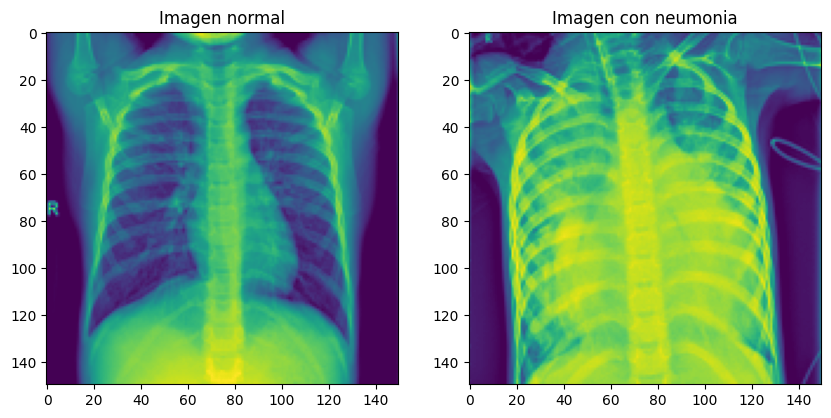

In [17]:
# Visualizamos una imagen de cada conjunto
muestra = np.random.randint(1000) # Fijamos un numero aleatorio para las muestras a visualizar para asegurarnos que esten correctas
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(train_normal[muestra])
plt.title('Imagen normal')

plt.subplot(1,2,2)
plt.imshow(train_neumonia[muestra])
plt.title('Imagen con neumonia')

print('Podemos observar la diferencia entre cada muestra. Se observa que tienen el mismo tamaño y están en escala de grises.\n')

In [132]:
# Obtenemos el balance de los conjuntos
print(f'\nEl conjunto de entranamiento "normal" ahora tiene {len(train_normal)} imagenes.')
print(f'El conjunto de entranamiento "neumonia" ahora tiene {len(train_neumonia)} imagenes.')
print(f'\nEl conjunto de pueba "normal" ahora tiene {len(test_normal)} imagenes.')
print(f'El conjunto de pueba "neumonia" ahora tiene {len(test_neumonia)} imagenes.')
print(f'\nEl conjunto de validacion "normal" ahora tiene {len(val_normal)} imagenes.')
print(f'El conjunto de validacion "neumonia" ahora tiene {len(val_neumonia)} imagenes.')

print('''\nLa muestra tiene un imbalance. Para resolverlo limitaremos el número 
de observaciones de "neumonia" para evitar un sesgo en el modelo''') # La muestra tiene un imbalance...

# Elaboramos un muestreo aleatorio para igualar el tamaño de 'neumonia' al de 'normal'
train_neumonia = resample(train_neumonia, n_samples=len(train_normal), random_state=10)
test_neumonia = resample(train_neumonia, n_samples=len(test_normal), random_state=10)

print(f'\nEl conjunto de entranamiento "normal" ahora tiene {len(train_normal)} imagenes.')
print(f'El conjunto de entranamiento "neumonia" ahora tiene {len(train_neumonia)} imagenes.')
print(f'\nEl conjunto de pueba "normal" ahora tiene {len(test_normal)} imagenes.')
print(f'El conjunto de pueba "neumonia" ahora tiene {len(test_neumonia)} imagenes.')
print(f'\nEl conjunto de validacion "normal" ahora tiene {len(val_normal)} imagenes.')
print(f'El conjunto de validacion "neumonia" ahora tiene {len(val_neumonia)} imagenes.')


El conjunto de entranamiento "normal" ahora tiene 1341 imagenes.
El conjunto de entranamiento "neumonia" ahora tiene 3881 imagenes.

El conjunto de pueba "normal" ahora tiene 234 imagenes.
El conjunto de pueba "neumonia" ahora tiene 390 imagenes.

El conjunto de validacion "normal" ahora tiene 8 imagenes.
El conjunto de validacion "neumonia" ahora tiene 8 imagenes.

La muestra tiene un imbalance. Para resolverlo limitaremos el número 
de observaciones de "neumonia" para evitar un sesgo en el modelo

El conjunto de entranamiento "normal" ahora tiene 1341 imagenes.
El conjunto de entranamiento "neumonia" ahora tiene 1341 imagenes.

El conjunto de pueba "normal" ahora tiene 234 imagenes.
El conjunto de pueba "neumonia" ahora tiene 234 imagenes.

El conjunto de validacion "normal" ahora tiene 8 imagenes.
El conjunto de validacion "neumonia" ahora tiene 8 imagenes.


In [151]:
# Unimos las listas balanceadas
X_train = np.concatenate((train_normal, train_neumonia), axis=0)
X_test = np.concatenate((test_normal, test_neumonia), axis=0)
X_val = np.concatenate((val_normal, val_neumonia), axis=0)

# Preparamos nuestras variables objetivo
y_train = np.concatenate((np.zeros(len(train_normal)), np.ones(len(train_neumonia))), axis=0)
y_test = np.concatenate((np.zeros(len(test_normal)), np.ones(len(test_neumonia))), axis=0)
y_val = np.concatenate((np.zeros(len(val_normal)), np.ones(len(val_neumonia))), axis=0)

# Obtenemos el numero total de observaciones por conjunto
obser_train = len(X_train)
obser_test = len(X_test)
obser_val = len(X_val)

print(f'El conjunto de entrenamiento ahora tiene {obser_train} imagenes.')
print(f'El conjunto de pueba ahora tiene {obser_test} imagenes.')
print(f'El conjunto de validacion ahora tiene {obser_val} imagenes.')

El conjunto de entrenamiento ahora tiene 2682 imagenes.
El conjunto de pueba ahora tiene 468 imagenes.
El conjunto de validacion ahora tiene 16 imagenes.


In [152]:
# Normalizamos los conjuntos
X_train = X_train / 255.0 
X_test = X_test / 255.0 
X_val = X_val / 255.0 

# Configuración de parámetros para el preprocesamiento de imágenes
batch_size = 32
image_shape = X_train[0].shape
epochs = 10

# Construir el modelo de red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_shape),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 128)     

In [153]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/10
84/84 [==============================] - 160s 2s/step - loss: 0.4490 - accuracy: 0.7882 - val_loss: 0.3633 - val_accuracy: 0.8125
Epoch 2/10
84/84 [==============================] - 145s 2s/step - loss: 0.1627 - accuracy: 0.9370 - val_loss: 0.3160 - val_accuracy: 0.8750
Epoch 3/10
84/84 [==============================] - 142s 2s/step - loss: 0.1367 - accuracy: 0.9478 - val_loss: 0.2269 - val_accuracy: 0.8750
Epoch 4/10
84/84 [==============================] - 142s 2s/step - loss: 0.0836 - accuracy: 0.9694 - val_loss: 0.4899 - val_accuracy: 0.6875
Epoch 5/10
84/84 [==============================] - 143s 2s/step - loss: 0.0747 - accuracy: 0.9713 - val_loss: 0.4714 - val_accuracy: 0.7500
Epoch 6/10
84/84 [==============================] - 141s 2s/step - loss: 0.0766 - accuracy: 0.9713 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 7/10
84/84 [==============================] - 143s 2s/step - loss: 0.0504 - accuracy: 0.9825 - val_loss: 0.0655 - val_accuracy: 1.0000
Epoch 8/10
84

In [155]:
# Evaluamos del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 6s 364ms/step - loss: 1.6028 - accuracy: 0.7030
Test Loss: 1.6027642488479614
Test Accuracy: 0.7029914259910583


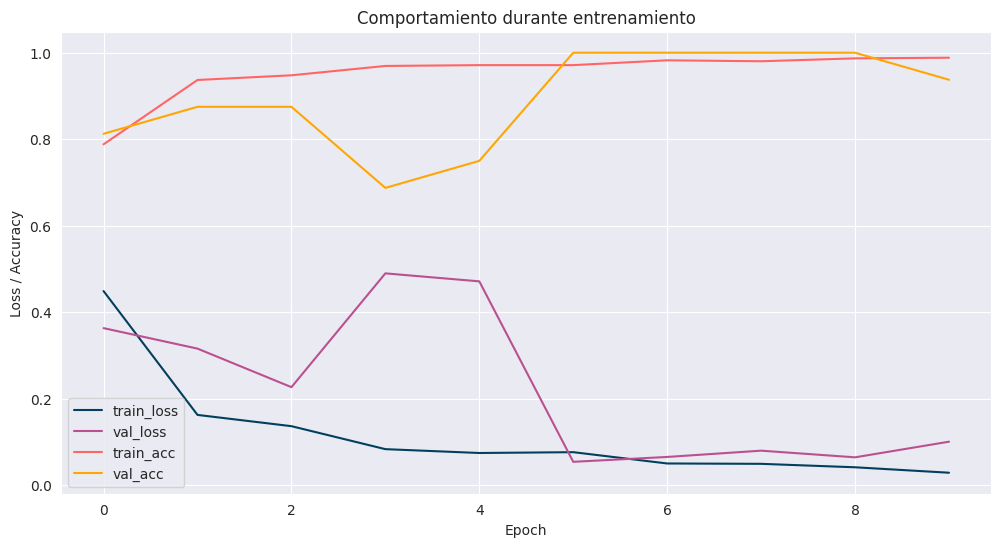

In [156]:
# Graficamos loss y accuracy durante el entrenamiento y la validación
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss', color='#01405C')
plt.plot(history.history['val_loss'], label='val_loss', color='#BB5091')
plt.plot(history.history['accuracy'], label='train_acc', color='#FF6565')
plt.plot(history.history['val_accuracy'], label='val_acc', color='#FEA703')
plt.title('Comportamiento durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [189]:
# Guardamos el modelo
model.save('pneumonia_trained.h5')

In [188]:
# Cargamos el modelo guardado
#model = load_model('pneumonia_trained.h5')

################################ Imagen Normal ################################
# Leemos la imagen en balance de grises
image1 = Image.open('01.jpeg').convert("L")

# Preparamos la imagen
image1 = image1.resize((150, 150))  # Ajustar al tamaño esperado por el modelo
image1 = img_to_array(image1)  # Convertir la imagen a array
image1 = image1 / 255.0  # Normalizar la imagen
image1 = np.expand_dims(image1, axis=0)  # Agregar una dimensión adicional

# Obtenemos la predicción del modelo
prediccion_img_normal = model.predict(image1)
prediccion_img_normal = np.round(prediccion_img_normal).item()
                                                                                    
# Mostramos la predicción (0 para imagen normal, 1 para imagen con neumonia)
print('\nEn esta consulta se cargará una imagen normal')
diagnóstico = 'normal' if prediccion_img_normal == 0 else 'neumonía'
print(f'El diagnóstico es {diagnóstico}\n')

############################### Imagen Neumonia ################################
# Leemos la imagen en balance de grises
image2 = Image.open('02.jpeg').convert("L")

# Preparamos la imagen
image2 = image2.resize((150, 150))  # Ajustar al tamaño esperado por el modelo
image2 = img_to_array(image2)  # Convertir la imagen a array
image2 = image2 / 255.0  # Normalizar la imagen
image2 = np.expand_dims(image2, axis=0)  # Agregar una dimensión adicional

# Obtenemos la predicción del modelo
prediccion_img_neu = model.predict(image2)
prediccion_img_neu = np.round(prediccion_img_neu).item()

# Mostramos la predicción (0 para imagen normal, 1 para imagen con neumonia)
print('\nEn esta consulta se cargará una imagen con neumonía')
diagnóstico = 'normal' if prediccion_img_neu == 0 else 'neumonía'
print(f'El diagnóstico es {diagnóstico}')


1/1 [==============================] - 0s 45ms/step

En esta consulta se cargará una imagen normal
El diagnóstico es normal

1/1 [==============================] - 0s 35ms/step

En esta consulta se cargará una imagen con neumonía
El diagnóstico es neumonía
